# 4.9 Data Visualization with Python

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


In [5]:
#Import updated ords_prods_merge dataframe with new columns
ords_prods_merge = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/2 Data/2 Prepared Data/ords_prods_merge')

# Creating Bar Charts

In [8]:
#Check head of dataframe to ensure correct column names
ords_prods_merge.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,spending_avg,spender_type,customer_frequency,customer_frequency_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,mid_range_product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,mid_range_product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,low_range_product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,low_range_product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,low_range_product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<Axes: xlabel='orders_dow'>

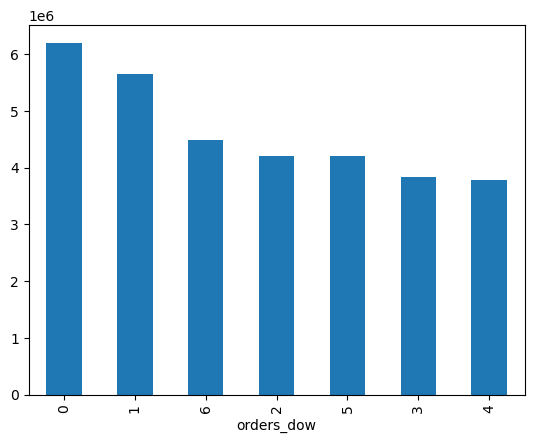

In [10]:
#Create bar chart for orders_dow column
ords_prods_merge['orders_dow'].value_counts().plot.bar()

<Axes: xlabel='orders_dow'>

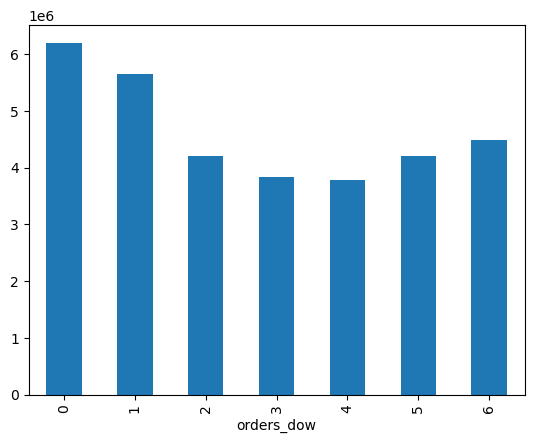

In [12]:
#Create same bar chart but keeping the days of the week in order
ords_prods_merge['orders_dow'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_dow'>

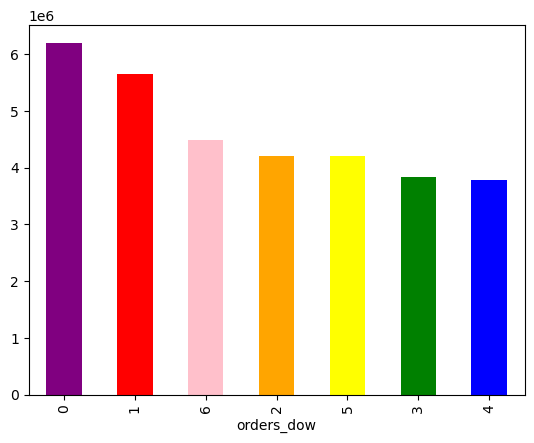

In [14]:
#Create same bar chart, but with color
ords_prods_merge['orders_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting Charts

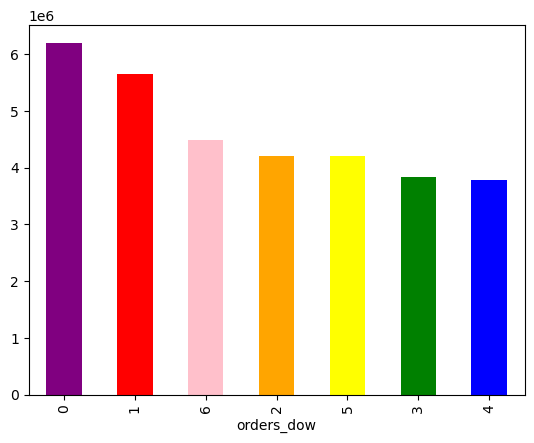

In [19]:
#Use 'bar' to save bar chart to Jupyter's memory
bar = ords_prods_merge['orders_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [21]:
# Export the orders_dow bar chart with color
bar.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

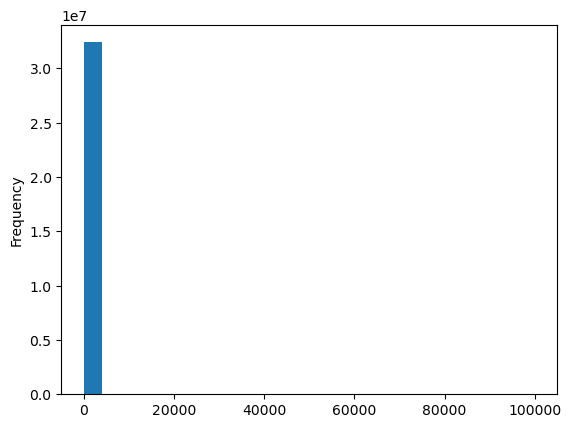

In [24]:
#Create a histogram showing the distribution of 'prices' data
ords_prods_merge['prices'].plot.hist(bins = 25)

In [26]:
#Check descriptive statistics
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

$99,999 is a very high max value.  It is likely an ourlier or something corrupt within the data.

<Axes: xlabel='prices', ylabel='prices'>

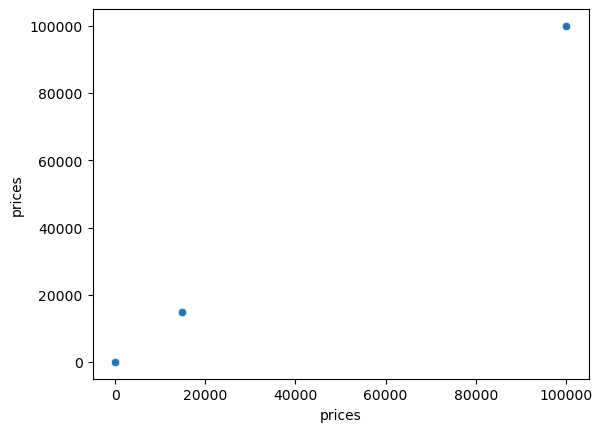

In [29]:
#Create a scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [31]:
#Check to see which items are more expensive than $100 
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,spending_avg,spender_type,customer_frequency,customer_frequency_flag
1576,171,912404,17,prior,12,2,14,5.0,21553,5,...,high_range_priduct,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,181,603376,17,prior,22,6,16,4.0,21553,3,...,high_range_priduct,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,1944,3264360,135,prior,2,2,21,13.0,21553,6,...,high_range_priduct,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,1945,892534,135,prior,3,0,8,12.0,21553,3,...,high_range_priduct,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,5708,229704,342,prior,8,1,19,30.0,21553,9,...,high_range_priduct,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3411856,3172853,205650,prior,18,1,9,7.0,21553,17,...,high_range_priduct,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,3414691,2504315,205818,prior,3,5,15,3.0,21553,13,...,high_range_priduct,Regularly busy,Regularly busy days,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,3414693,1108388,205818,prior,5,4,5,1.0,21553,5,...,high_range_priduct,Least busy,Least busy days,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,3418470,1916142,206049,prior,1,2,17,NaN,21553,2,...,high_range_priduct,Regularly busy,Regularly busy days,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [33]:
#Change all 'prices' over $100 into missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [35]:
#Check to ensure it worked
ords_prods_merge['prices'].max()

25.0

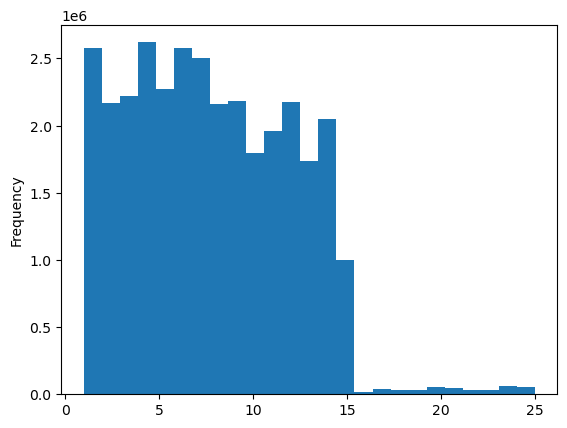

In [37]:
#Try histogram again now that outliers have been dealt with
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

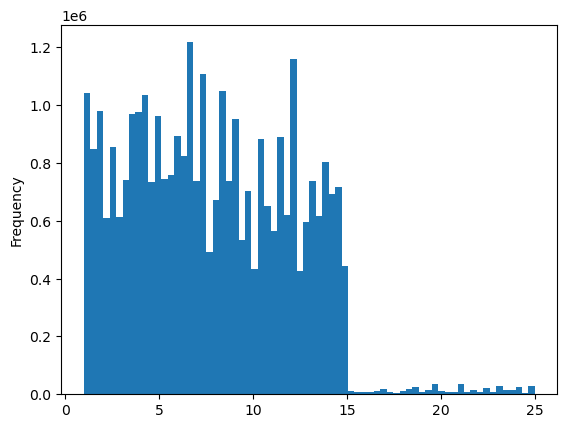

In [39]:
#Redo histogram again with 70 bins
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

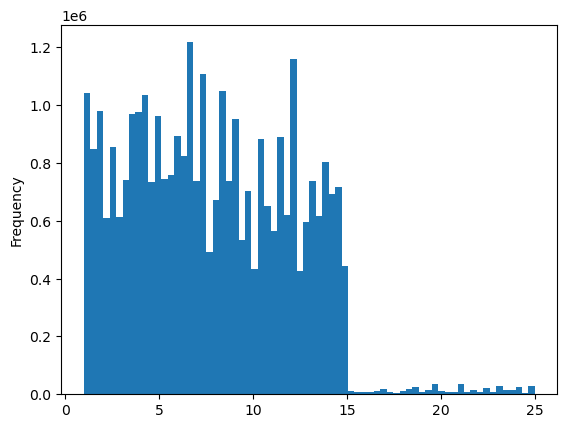

In [41]:
#Use 'hist_prices' to save bar chart to Jupyter's memory
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70)

In [43]:
# Export the hist_prices histogram 
hist_prices.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'hist_prices.png'))

# Creating Line Charts & Sampling Data

In [47]:
#Create a sample of the data using a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [49]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [53]:
#Store 70% of the sample in the dataframe 'big'
big = ords_prods_merge[dev]

In [55]:
#Store 30% of the sample in the dataframe 'small'
small = ords_prods_merge[~dev]

In [57]:
#Check to ensure that the 'big' and 'small' dataframes still include same number of rows as the ords_prods_merge dataframe
len(ords_prods_merge)

32404859

In [59]:
#Check 'big' and 'small' combined to ensure same result
len(big) + len(small)

32404859

In [63]:
#Reduce memory by reducing samples to only include necessary data; 'orders_dow' and 'prices'
df_2 = small[['orders_dow','prices']]

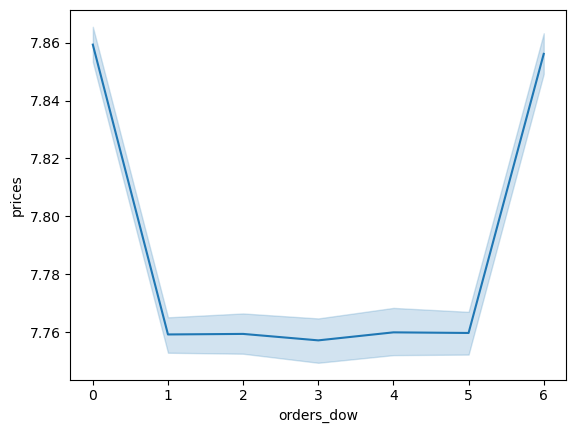

In [65]:
#Create a line chart to show 'prices' by 'orders_dow'
line = sns.lineplot(data = df_2, x = 'orders_dow',y = 'prices')